<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_2/mortgages_graphic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estatura media de los atletas**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 18 de enero de 2022 
*   Fechad de actualización: 18 de enero de 2022
*   Descripción: Crear un garfico de las hipotecas de 15 y 30 años.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos 
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [ ]:
mortgage =  '/content/drive/MyDrive/Coding_Dojo/Semana 3 /Data/mortgages (1).csv' #Nombro a la base
mortgage_df = pd.read_csv(mortgage) #le doy un nombre a la trama 
#de datos  ene ste caso el sugerido en la tarea como no tiene titulos el archivo txt uso el metodo header y que mantega los 
#valores vacios con na 
mortgage_df.head() #Observo que los datos hayan sido leidos de forma correcta

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
thirty_year = mortgage_df['Mortgage Name']== '30 Year' #establezco un primer filtro para obtener unicamente la data de las hipotecas a 30 años
thirty_year             

0        True
1        True
2        True
3        True
4        True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Mortgage Name, Length: 1080, dtype: bool

In [ ]:
three_interestrate= mortgage_df['Interest Rate']==0.03 #establezco un segundo filtro para la tasa de interes del 3%
three_interestrate

0        True
1        True
2        True
3        True
4        True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Interest Rate, Length: 1080, dtype: bool

In [ ]:
thirty_year_3IR= mortgage_df.loc[thirty_year & three_interestrate,:] #uno los dos filtros para obtener los datos de hipotecas a 30 años y al 3% de interes 
thirty_year_3IR.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
five_interestrate= mortgage_df['Interest Rate']==0.05 #establezco un segundo filtro para la tasa de interes del 5%
five_interestrate   

0       False
1       False
2       False
3       False
4       False
        ...  
1075     True
1076     True
1077     True
1078     True
1079     True
Name: Interest Rate, Length: 1080, dtype: bool

In [ ]:
thirty_year_5IR= mortgage_df.loc[thirty_year & five_interestrate,:] #uno los dos filtros para obtener los datos de hipotecas a 30 años y al 5% de interes 
thirty_year_5IR.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


### Agregar columna de pagos 

In [ ]:
data1 = thirty_year_3IR.groupby(['Mortgage Name', 'Interest Rate', 'Month'])['Interest Paid'].sum().groupby(level=0).cumsum()
#Para realizar esta agrupacion debemos tener en cuenta que solo realizar el comando cumsum nos va arrojar unicamente la suma
#acumalada de mes en mes para esto primero pedimos que realice la suma de la agrupacion que deseamos realizar despues 
#al ser un agrupamiento multiindice pedimos que relice la seleccion de niveles desde el nivel 0 que en este caso seria
#mortage name y una vez estableciudo los multiniveles pedimos que relice la suma aculada la cual sera tomada de la columna 
#que pedimos sea sumada en la primera pagrte del codigo
data1

Mortgage Name  Interest Rate  Month
30 Year        0.03           1          1000.00
                              2          1998.28
                              3          2994.84
                              4          3989.67
                              5          4982.77
                                         ...    
                              356      207064.13
                              357      207080.87
                              358      207093.44
                              359      207101.82
                              360      207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
data2 = thirty_year_5IR.groupby(['Mortgage Name', 'Interest Rate', 'Month'])['Interest Paid'].sum().groupby(level=0).cumsum()
#Para realizar esta agrupacion debemos tener en cuenta que solo realizar el comando cumsum nos va arrojar unicamente la suma
#acumalada de mes en mes para esto primero pedimos que realice la suma de la agrupacion que deseamos realizar despues 
#al ser un agrupamiento multiindice pedimos que relice la seleccion de niveles desde el nivel 0 que en este caso seria
#mortage name y una vez estableciudo los multiniveles pedimos que relice la suma aculada la cual sera tomada de la columna 
#que pedimos sea sumada en la primera pagrte del codigo
data2

Mortgage Name  Interest Rate  Month
30 Year        0.05           1          1666.66
                              2          3331.32
                              3          4993.97
                              4          6654.60
                              5          8313.20
                                         ...    
                              356      372928.64
                              357      372964.02
                              358      372990.60
                              359      373008.35
                              360      373017.23
Name: Interest Paid, Length: 360, dtype: float64

### Gráfico 

#### Creacion de las lineas que deseo tomar 

In [ ]:
data1_df=data1.reset_index() #en esta linea se realiza un reseteo del inice de mi nuevo data frame para poder realizar 
#una mejor amnipulacion de los datos 
data1_df.head()# realizo una vizaulizacion de los primeros datos de mi data frame para observar si lo que rrealice esta bien 

,Mortgage Name,Interest Rate,Month,Interest Paid
0,30 Year,0.03,1,1000.00
1,30 Year,0.03,2,1998.28
2,30 Year,0.03,3,2994.84
3,30 Year,0.03,4,3989.67
4,30 Year,0.03,5,4982.77


In [ ]:
data2_df=data2.reset_index() #en esta linea se realiza un reseteo del inice de mi nuevo data frame para poder realizar 
#una mejor amnipulacion de los datos 
data2_df.head()# realizo una vizaulizacion de los primeros datos de mi data frame para observar si lo que rrealice esta bien 

,Mortgage Name,Interest Rate,Month,Interest Paid
0,30 Year,0.05,1,1666.66
1,30 Year,0.05,2,3331.32
2,30 Year,0.05,3,4993.97
3,30 Year,0.05,4,6654.60
4,30 Year,0.05,5,8313.20


In [ ]:
line1 = data1_df[['Month','Interest Paid']] #defino la  linea que deseo observar en el 
#nuevo grafico tomando en cuenta que genero para tomar en cuenta solo los valores del año y la tasa de interes a la que se realiza la hipoteca 
line1.head() #verifico

,Month,Interest Paid
0,1,1000.00
1,2,1998.28
2,3,2994.84
3,4,3989.67
4,5,4982.77


In [ ]:
months1 = list(line1['Month']) #defino mis valores que tomaran en el eje de las x en forma de lista 
months1

In [ ]:
total_repayment1 = list(round(line1['Interest Paid'],2)) #defino mis valores que tomaran en el eje de las y en forma de lista ademas le pido al codigo que me muestre
#unicamente los valores con 2 decimales 
total_repayment1

In [ ]:
line2 = data2_df[['Month','Interest Paid']]#defino la  linea que deseo observar en el 
#nuevo grafico tomando en cuenta que genero para tomar en cuenta solo los valores del año y la tasa de interes a la que se realiza la hipoteca
line2.head()

,Month,Interest Paid
0,1,1666.66
1,2,3331.32
2,3,4993.97
3,4,6654.60
4,5,8313.20


In [ ]:
months2 = list(line2['Month']) #defino mis valores que tomaran en el eje de las x en forma de lista 
months2

In [ ]:
total_repayment2 = list(round(line2['Interest Paid'],2)) #defino mis valores que tomaran en el eje de las y en forma de lista ademas le pido al codigo que me muestre
#unicamente los valores con 2 decimales 
total_repayment2

#### Creacion del grafico mon las lineas creadas 

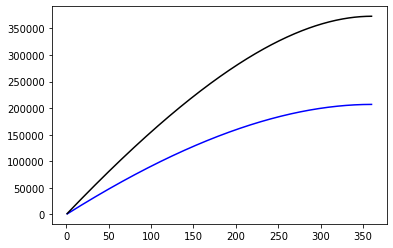

In [ ]:
plt.figure()
plt.plot(months1,total_repayment1,c='blue')
plt.plot(months2,total_repayment2,c='black')
plt.show()